In [1]:
'''
Revisiting Rainbow: Promoting more insightful and inclusive deep reinforcement learning research.
Obando-Ceron, Johan S and Castro, Pablo Samuel
'''

'''
Install to use MinAtar env.

!git clone https://github.com/kenjyoung/MinAtar.git
%cd MinAtar
!pip install .
'''

'''
Install to use LunarLander env.

!apt install swig
!pip install box2d box2d-kengz
'''

!pip install dm-env
!pip install dopamine-rl==3.1.10

In [2]:
import numpy as np
import os
import sys
import dopamine
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

In [3]:
import matplotlib
#matplotlib.use('TKAgg')

#import minatar
#minatar.__version__

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/SaveFiles/test/'
LOG_PATH = os.path.join(path, 'dqn_test')
sys.path.append(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from dqn_agent_new import*
#from rainbow_agent_new import*
#from quantile_agent_new import*
#from implicit_quantile_agent_new import*

In [6]:
def create_random_dqn_agent(sess, environment, summary_writer=None):
  """The Runner class will expect a function of this type to create an agent."""
  return JaxDQNAgentNew(num_actions=environment.action_space.n)
  #return JaxRainbowAgentNew(num_actions=environment.action_space.n)
  #return JaxQuantileAgentNew(num_actions=environment.action_space.n)
  #return JaxImplicitQuantileAgentNew(num_actions=environment.action_space.n)
 
gin.parse_config_file('/content/drive/My Drive/SaveFiles/test/dqn_cartpole.gin')
#gin.parse_config_file('/content/drive/My Drive/SaveFiles/test/dqn_acrobot.gin')

random_dqn_runner = run_experiment.TrainRunner(LOG_PATH, create_random_dqn_agent)

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
print('Will train agent, please be patient, may be a while...')
random_dqn_runner.run_experiment()
print('Done training!')

Will train agent, please be patient, may be a while...


Done training!


Reading statistics from: /content/drive/My Drive/SaveFiles/test/dqn_test//logs/log_29


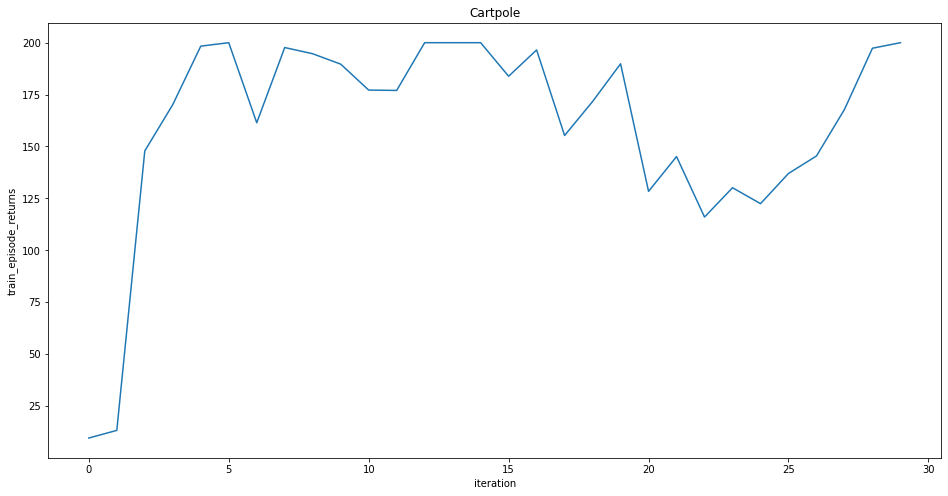

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

data = colab_utils.read_experiment(LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
data['agent'] = 'Cartpole'
data['run'] = 1

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns',  data=data, ax=ax)
plt.title('Cartpole')
plt.show()